## 导入工具包

In [1]:
import os
import numpy as np
import pandas as pd
import cv2

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 指定数据集路径

In [2]:
# 指定数据集路径
dataset_path = 'jiyouguan'
os.chdir(dataset_path)
os.listdir()

['body_broken', 'normal', 'side_broken', 'top_broken']

<!-- 
os.listdir() 函数返回当前目录下所有的文件和文件夹，os.chdir() 函数用来切换当前工作目录。
pd.DataFrame() 创建一个空的 pandas DataFrame。
for fruit in tqdm(os.listdir()): 遍历每个类别，tqdm 是一个 Python 进度条库，用来显示遍历进度。
os.chdir(fruit) 切换到当前类别的目录。
for file in os.listdir(): 遍历当前目录下的所有图片文件。
img = cv2.imread(file) 读取当前图片文件。
df = df.append({...}, ignore_index=True) 将当前图片的类别、文件名、图像宽和图像高添加到 pandas DataFrame 中。 
-->

In [3]:
df = pd.DataFrame()
for pot in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(pot)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':pot, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|██████████| 4/4 [00:46<00:00, 11.52s/it]


In [4]:
df

,类别,文件名,图像宽,图像高
0,body_broken,body_broken10_frame0.jpg,1080.0,1920.0
1,body_broken,body_broken10_frame1.jpg,1080.0,1920.0
2,body_broken,body_broken10_frame2.jpg,1080.0,1920.0
3,body_broken,body_broken10_frame3.jpg,1080.0,1920.0
4,body_broken,body_broken10_frame4.jpg,1080.0,1920.0
...,...,...,...,...
1764,top_broken,top_broken9_frame5.jpg,1080.0,1920.0
1765,top_broken,top_broken9_frame6.jpg,1080.0,1920.0
1766,top_broken,top_broken9_frame7.jpg,1080.0,1920.0
1767,top_broken,top_broken9_frame8.jpg,1080.0,1920.0


## 可视化图像尺寸分布

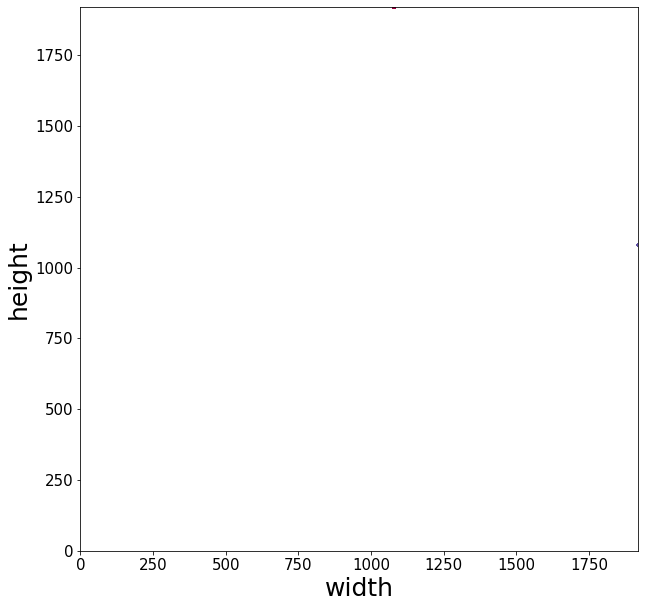

In [5]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy, bw_method='silverman')(xy)

#z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)
# plt.xlim(xmin=0, xmax=5000)
# plt.ylim(ymin=0, ymax=5000)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [16]:
# from PIL import Image
# import os

# # 文件夹路径
# folder_path = 'youguan_full/photo_normal'

# # 遍历文件夹中的所有文件
# for file_name in os.listdir(folder_path):
#     # 如果是图片文件
#     if file_name.endswith('.jpg') or file_name.endswith('.png'):
#         # 拼接完整文件路径
#         file_path = os.path.join(folder_path, file_name)
#         # 打开图像
#         img = Image.open(file_path)
#         # 如果图像是1080*1920像素
#         if img.size == (1080, 1920):
#             # 旋转90度
#             img = img.transpose(Image.ROTATE_90)
#             # 保存图像
#             img.save(file_path)
